In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split


# Load the data

In [4]:
data = pd.read_csv('speeddating.csv', encoding='ISO-8859-1')

In [5]:
# Extract the relevant features and drop missing values
X = data[['attractive','ambition', 'funny', 'intelligence', 'sincere', 'age_o', 'expected_happy_with_sd_people','ambtition_important', 'pref_o_funny']].dropna().values

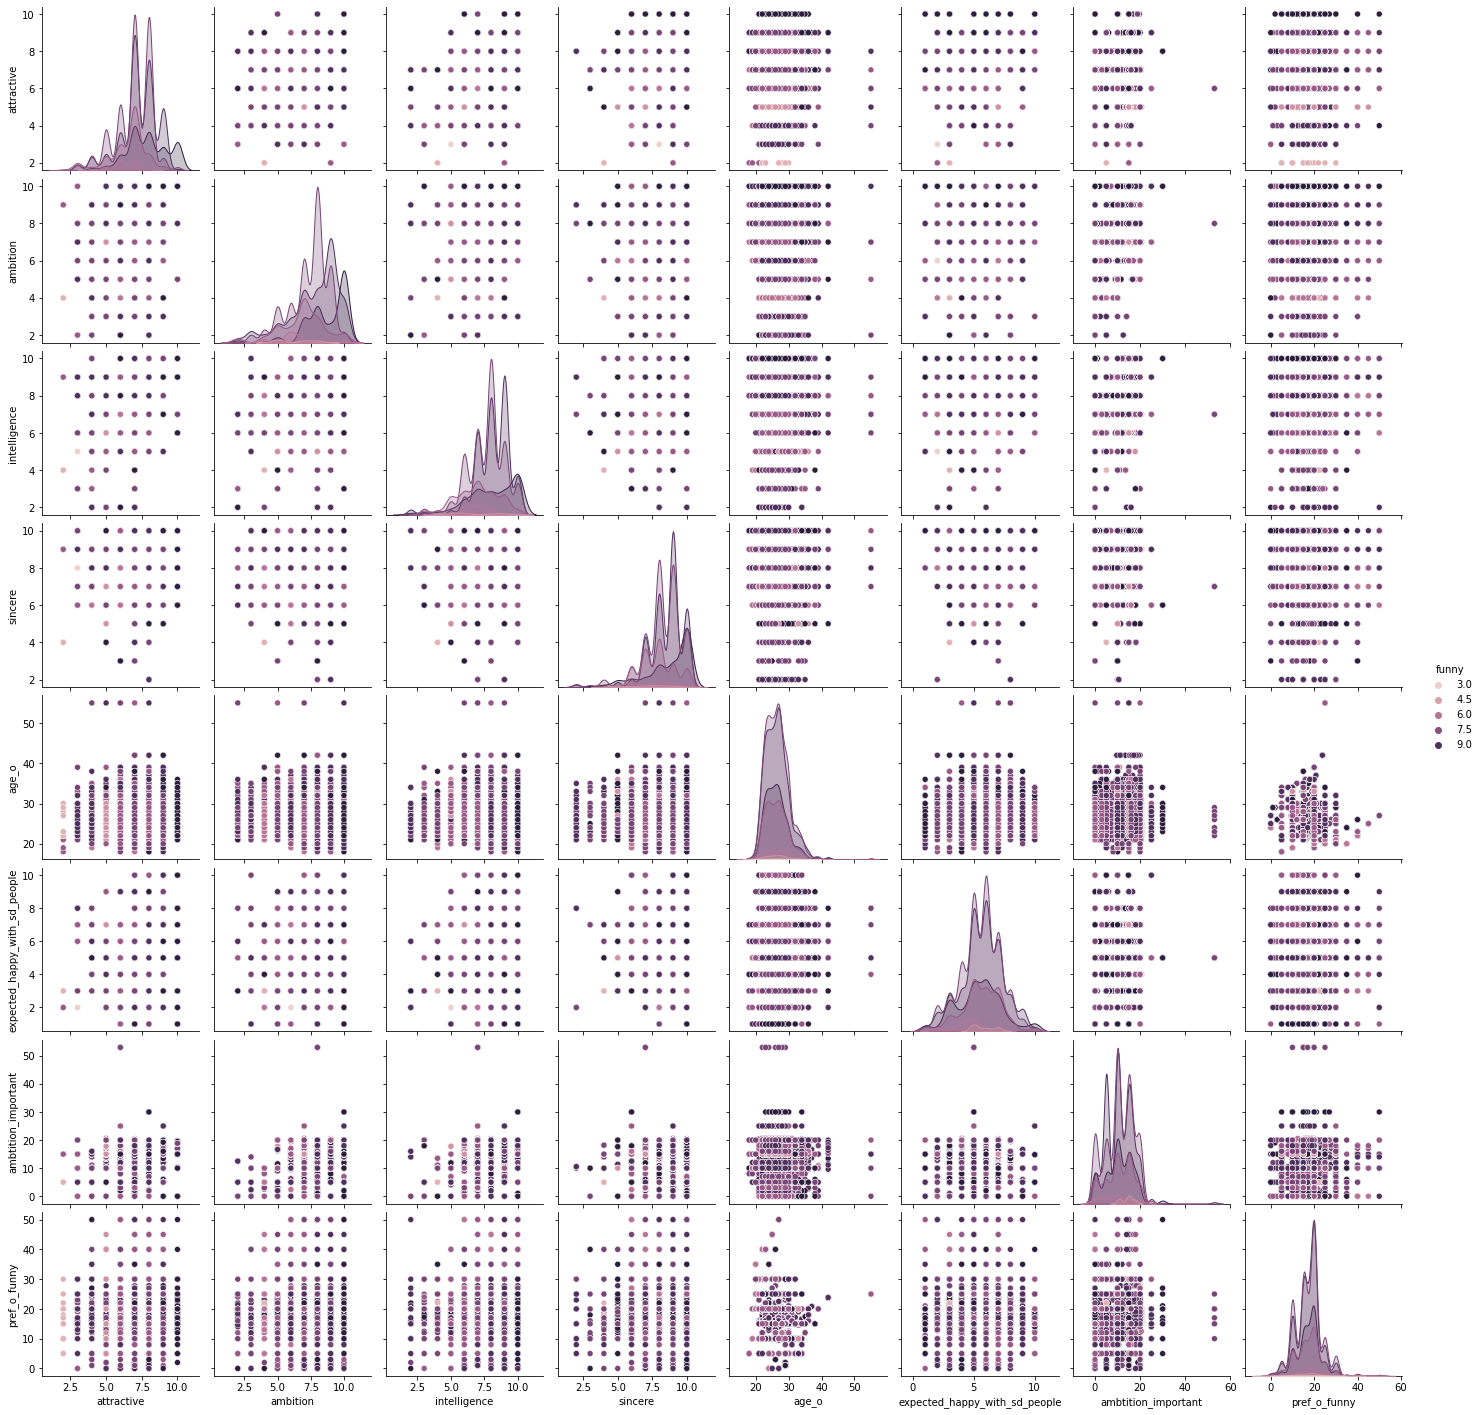

In [8]:
import seaborn as sns
import pandas as pd

# create a dataframe from the extracted features
df = pd.DataFrame(X, columns=['attractive','ambition', 'funny', 'intelligence', 'sincere', 'age_o', 'expected_happy_with_sd_people','ambtition_important', 'pref_o_funny'])

# create the pair plot
sns.pairplot(df,hue='funny')


In [4]:
# Normalize the features
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X_norm, test_size=0.3, random_state=0, shuffle=True)



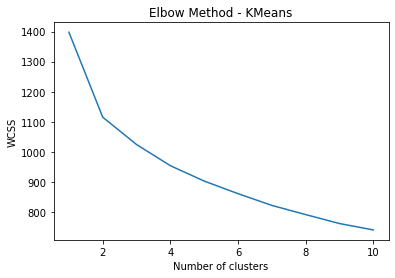

In [5]:
# Perform KMeans clustering and elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method - KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_test)

In [7]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=2)
y_dbscan = dbscan.fit_predict(X_test)

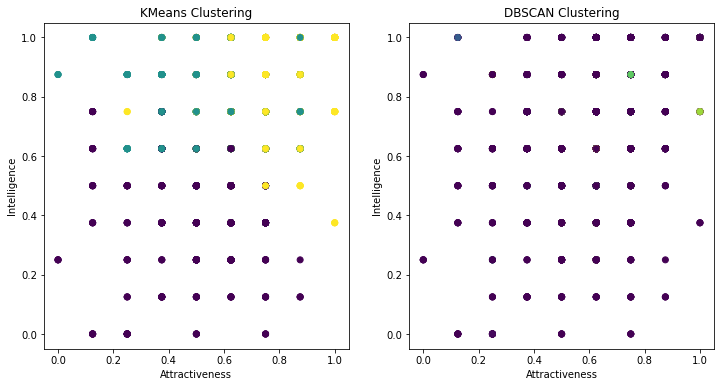

In [8]:
# Plot the results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Attractiveness')
plt.ylabel('Intelligence')
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Attractiveness')
plt.ylabel('Intelligence')
plt.show()


In [9]:
# Calcular las medias de cada cluster
cluster_means = []
for i in range(3):
    cluster_means.append(X_test[y_kmeans == i].mean(axis=0))



# Mostrar los componentes con los valores más altos para cada cluster
for i in range(3):
    print(f"Cluster {i+1}:")
    sorted_indices = np.argsort(cluster_means[i])[::-1]
    for j in range(3):
        feature_index = sorted_indices[j]
        feature_value = cluster_means[i][feature_index]
        print(f"  {feature_index}: {feature_value}")


Cluster 1:
  4: 0.7426584234930448
  2: 0.6752042393464335
  3: 0.5718701700154559
Cluster 2:
  2: 0.7806419424580039
  1: 0.770663562281723
  4: 0.7303550640279395
Cluster 3:
  4: 0.8731101511879049
  2: 0.8412526997840151
  3: 0.8404427645788337


In [10]:
# Calcular la varianza de cada cluster
cluster_variances = []
for i in range(3):
    cluster_variances.append(np.var(X_test[y_kmeans == i], axis=0))


# Mostrar las características con las varianzas más altas para cada cluster
for i in range(3):
    print(f"Cluster {i+1}:")
    sorted_indices = np.argsort(cluster_variances[i])[::-1]
    for j in range(3):
        feature_index = sorted_indices[j]
        feature_variance = cluster_variances[i][feature_index]
        print(f"  {feature_index}: {feature_variance}")

Cluster 1:
  3: 0.04052633244865737
  6: 0.03842331550208505
  0: 0.03041427083507525
Cluster 2:
  4: 0.03597539779449519
  3: 0.02643113354321364
  6: 0.025453433464571722
Cluster 3:
  6: 0.02617489664901694
  0: 0.01837966893534046
  1: 0.016911424488848515


## 0:'attractive'
## 1:'ambition'
## 2:'funny'
## 3:'intelligence'
## 4:'sincere'
## 5:'age_o'
## 6:'expected_happy_with_sd_people'
## 7:'ambtition_important'
## 8'pref_o_funny'